# Gai/Lib: Examples

## Text-to-Text (TTT)

Example: Mistral7b

In [3]:
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

# Mistral7B
print("> Mistral-7B")
for chunk in ggg(category="ttt",messages="user: Tell me a one paragraph story\nassistant:"):
    print(chunk.decode(),end="",flush=True)
print("\n")

> Mistral-7B
 Once upon a time, in a small village nestled at the foot of a mountain, there lived an old woman who had spent her entire life tending to her garden. She was known throughout the land for her beautiful flowers and lush vegetables, which she would sell at the local market every week. One day, as she was out picking her produce, she stumbled across a mysterious seed that she had never seen before. Without hesitation, she planted it in her garden and watched as it grew into the most magnificent tree she had ever seen. The tree bore fruit unlike any other, with juicy oranges that were filled with gold coins. The villagers were amazed by this newfound treasure and flocked to the old woman's house to get their share. From then on, the old woman became rich beyond her wildest dreams, all thanks to the magical seed she found in her garden.({'finish_reason': 'stop'}, 'finish_reason')



Example: GPT4

In [1]:
from dotenv import load_dotenv
load_dotenv()
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

# GPT4
print("> OpenAI")
for chunk in ggg(category="ttt",generator="gpt-4",messages="user: Tell me a one paragraph story\nassistant:"):
    print(chunk.decode(),end="",flush=True)
print("\n")

DEBUG    base_url=https://gaiaio.ai/api


> OpenAI
In the heartland of a mystical kingdom, a shoemaker named Theodore lived a simple life. Facing hardship, he grew a single rose in his desolate garden and prided himself on his work despite his dwindling riches. One evening, a weary beggar passed by Theodore's humble abode and the good-hearted shoemaker offered him food and shelter. At dawn, the beggar transformed into a handsome prince, revealing that he was under a curse, destined to wander as a beggar until someone offered him kindness without expecting anything in return. For his extraordinary compassion, the prince gifted Theodore with a golden rose, a magical charm that cast a spell of boundless prosperity over his once-impoverished life.None



Example: API Compatible

In [2]:
print("> OpenAI API")

import os
import openai
from openai import OpenAI
from dotenv import load_dotenv
load_dotenv()
if not os.environ.get("OPENAI_API_KEY"):
    raise Exception(
        "OPENAI_API_KEY not found in environment variables")
openai.api_key = os.environ["OPENAI_API_KEY"]
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role":"user","content":"Tell me a one paragraph story"}],
    stream=True,
    max_tokens=100,
)
for chunk in response:
    if chunk.choices[0].delta.content:
        print(chunk.choices[0].delta.content,end="",flush=True)

> OpenAI API
In the small, vibrant town of Petalwood, there lived an unusual, elderly lady named Meredith. Most townsfolk were perplexed by Meredith, mainly because instead of classic feline or canine companions, her quaint, colorful cottage was a safe haven for dozens of rescued birds. Songbirds, parrots, falcons, and even owls found sanctuary within her garden, signaling their presence with a symphony of chirps, squawks and hoots. One fateful day, a storm

### TTT With Function Call

OpenAPI provides a powerful feature for its API known as Function Calling. Essentially, this is a mechanism for the LLM to seek external assistance when it encounters limitations in its text generation capabilities. It does this by returning a string that emulates the calling of a function, based on the function description provided by the user.

In the following example, we demonstrate function calling  being to an open source model using Mistral7b.

Example: Function call with Mistral7b

In [3]:
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

# Mistral7B
print("> Mistral-7B")
response = ggg(category="ttt",
    messages="user: What is today's date?\nassistant:",
    tools=[
        {
            "type": "function",
            "function": {
                "name": "gg",
                "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "search_query": {
                            "type": "string",
                            "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                        }
                    },
                    "required": ["search_query"]
                }
            }
        }                   
    ],
    stream=False)
print(response.decode())

DEBUG    base_url=https://gaiaio.ai/api
DEBUG    TTTClient.api: messages=user: What is today's date?
assistant:
DEBUG    httppost:url=https://gaiaio.ai/api/gen/v1/chat/completions
DEBUG    httppost:data={'beam_length': 1,
 'beams': 1,
 'max_new_tokens': 1000,
 'messages': [{'content': "What is today's date?", 'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'min_p': 0.0,
 'model': 'mistral7b-exllama',
 'stream': False,
 'temperature': 1.2,
 'token_repetition_penalty_decay': 128,
 'token_repetition_penalty_max': 1.25,
 'token_repetition_penalty_sustain': 256,
 'tools': [{'function': {'description': "The 'gg' function is a powerful tool "
                                        'that allows the AI to gather external '
                                        'information from the internet using '
                                        'Google search. It can be invoked when '
                                        'the AI needs to answer a question or '
            

> Mistral-7B
{'type': 'function', 'name': 'gg', 'arguments': '{"search_query": "current date"}'}


Example: function call with GPT4

In [4]:
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

# OpenAI
print("> OpenAI")
response = ggg(category="ttt",
                generator="gpt-4",
               messages="user: Who is the current president of Singapore?\nassistant:",
                tools=[
                    {
                        "type": "function",
                        "function": {
                            "name": "gg",
                            "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                            "parameters": {
                                "type": "object",
                                "properties": {
                                    "search_query": {
                                        "type": "string",
                                        "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                                    }
                                },
                                "required": ["search_query"]
                            }
                        }
                    }                   
                ],
               stream=False)
print(response.decode())

DEBUG    base_url=https://gaiaio.ai/api


> OpenAI
{'type': 'function', 'name': 'gg', 'arguments': '{\n  "search_query": "current president of Singapore"\n}'}


Example: function call with API compatibility

In [5]:
print("> OpenAI Original")
import os,json
import openai
from openai import OpenAI
from dotenv import load_dotenv
load_dotenv()
if not os.environ.get("OPENAI_API_KEY"):
    raise Exception(
        "OPENAI_API_KEY not found in environment variables")
openai.api_key = os.environ["OPENAI_API_KEY"]
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role":"user","content":"Tell me the latest news on Singapore"}],
    stream=True,
    max_tokens=100,
    tools=[
        {
            "type": "function",
            "function": {
                "name": "gg",
                "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "search_query": {
                            "type": "string",
                            "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                        }
                    },
                    "required": ["search_query"]
                }
            }
        }                   
    ],
)
tool = {}
tool["arguments"]=""
for chunk in response:
    if chunk.choices[0].delta.tool_calls and chunk.choices[0].delta.tool_calls[0].function.name:
        tool["name"] = chunk.choices[0].delta.tool_calls[0].function.name
    elif chunk.choices[0].delta.tool_calls and chunk.choices[0].delta.tool_calls[0].function.arguments:
        tool["arguments"] += chunk.choices[0].delta.tool_calls[0].function.arguments
print(json.dumps(tool, indent=4)+"\n")

> OpenAI Original
{
    "arguments": "{\n  \"search_query\": \"latest news Singapore\"\n}",
    "name": "gg"
}



-----

## Text-to-Speech (TTS)

Here is the input text "The definition of insanity is doing the same thing over and over and expecting different results."

In [6]:
from gai.common.sound_utils import play_audio,save_audio

data = {
    "input": "The definition of insanity is doing the same thing over and over and expecting different results.",
    "voice": None,
    "language": None
}

Example: Generate speech with Coqui xTTS

In [7]:
from gai.lib.GGG import GGG

ggg=GGG("../gai-lib/gai.yml")
response = ggg("tts", **data)
play_audio(response)

DEBUG    base_url=https://gaiaio.ai/api
DEBUG    httppost:url=https://gaiaio.ai/api/gen/v1/audio/speech
DEBUG    httppost:data={'input': 'The definition of insanity is doing the same thing over and over '
          'and expecting different results.',
 'language': None,
 'model': 'xtts-2',
 'stream': True,
 'voice': None}


Example: Generate speech with OpenAI

In [8]:
# openai tts
response = ggg("tts", generator="openai-tts-1", **data)
play_audio(response)

DEBUG    base_url=https://gaiaio.ai/api


Example: API Compatibility

In [ ]:
# openai original
response = client.audio.speech.create(
    model='tts-1', input="The definition of insanity is doing the same thing over and over and expecting different results.", voice="alloy")
play_audio(response.content)

## Speech-to-Text (STT)

Original Audio

In [9]:
# sample
with open("./today-is-a-wonderful-day.wav", "rb") as f:
    play_audio(f.read())

Example: Transcribe audio with local Whisper

In [10]:
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

# OpenSource Whisper
with open("./today-is-a-wonderful-day.wav", "rb") as f:
    output = ggg("stt", file=f)
    print(output.decode())

DEBUG    base_url=https://gaiaio.ai/api
DEBUG    httppost:url=https://gaiaio.ai/api/gen/v1/audio/transcriptions
DEBUG    httppost:data=None


 Today is a wonderful day to build something people love.


Example: Transcribe audio with OpenAI Whisper

In [11]:
# OpenAI Whisper
with open("./today-is-a-wonderful-day.wav", "rb") as f:
    output = ggg("stt", generator="openai-whisper", file=f)
    print(output.text)

DEBUG    base_url=https://gaiaio.ai/api


Today is a wonderful day to build something people love.


## Image-to-Text (ITT)

Here is the image

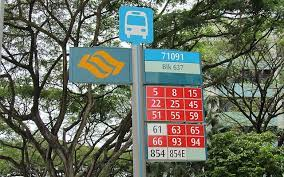

In [12]:
from gai.common.image_utils import read_to_base64
import os
from IPython.display import Image,display
encoded_string = read_to_base64("./buses.jpeg")
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "What’s in this image?"},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_string}",
                },
            },
        ],
    }
]
display(Image("./buses.jpeg"))

Example: Describe with Llava

DEBUG    base_url=https://gaiaio.ai/api
DEBUG    httppost:url=https://gaiaio.ai/api/gen/v1/vision/completions
DEBUG    httppost:data={'messages': [{'content': [{'text': 'What’s in this image?', 'type': 'text'},
                           {'image_url': {'url': ''},
                            'type': 'image_url'}],
               'role': 'user'}],
 'model': 'llava-transformers',
 'stream': True}

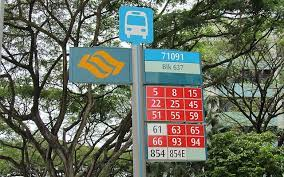

> Llava
The image features a bus stop with a large sign displaying a bus route number and a map of the bus route. The sign is located near a tree, making it easily visible to passengers. The bus stop is situated in a park-like setting, providing a pleasant environment for people to wait for the bus.({'finish_reason': 'stop'}, 'finish_reason')



In [13]:
# Llava
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

print("> Llava")
for chunk in ggg("itt",messages=messages,stream=True):
    print(chunk.decode(),end="",flush=True)
print("\n")


Example: Describe with OpenAI Vision

In [14]:
# OpenAI
print("> OpenAI")
for chunk in ggg(category="itt", generator="openai-vision", messages=messages, stream=True, max_tokens=100):
    print(chunk.decode(), end="", flush=True)
print("\n")

DEBUG    base_url=https://gaiaio.ai/api


> OpenAI
This image contains a bus stop sign with various elements on it. The top of the sign features a blue rectangle with a white bus symbol, indicating that it is indeed a bus stop. Below this, there is a sign with a unique identifier for the bus stop (71091) and an alphanumeric code (B01 K527). Additionally, there are bus route numbers displayed in both red and white rectangles, suggesting these are the routes that service this particular bus stop. The background includes trees, indicating theNone



## Retrieval Augmented Generation (RAG)

Step 1: Index the file 'pm_long_speech_2023.txt' into the vector database. This will break down the file into chunks of 1000 char and convert to text embeddings, then store them in the database.

In [1]:
# Index 2023 national day speech 
import asyncio
from gai.lib.RAGClientAsync import RAGClientAsync

async def listener(status):
    print(status)
rag=RAGClientAsync("./gai.local.yml")
await rag.index_document_async(
        collection_name="demo",
        file_path="./pm_long_speech_2023.txt",
        title="2023 National Day Rally Speech",
        source="https://www.pmo.gov.sg/Newsroom/national-day-rally-2023",
        listener_callback=listener,
    )

DEBUG    base_url=http://localhost:12031/gen/v1/rag
INFO     Connected to ws://localhost:12031/gen/v1/rag/index-file/ws/demo


{"message": "Request received."}
{"message": "Breaking down document into chunks ..."}
{"message": "Start indexing..."}
{"progress": 1}
{"progress": 3}
{"progress": 4}
{"progress": 6}
{"progress": 7}
{"progress": 9}
{"progress": 10}
{"progress": 12}
{"progress": 13}
{"progress": 15}
{"progress": 16}
{"progress": 18}
{"progress": 19}
{"progress": 21}
{"progress": 22}
{"progress": 24}
{"progress": 25}
{"progress": 27}
{"progress": 28}
{"progress": 30}
{"progress": 31}
{"progress": 33}
{"progress": 34}
{"progress": 36}
{"progress": 37}
{"progress": 39}
{"progress": 40}
{"progress": 42}
{"progress": 43}
{"progress": 45}
{"progress": 46}
{"progress": 48}
{"progress": 50}
{"progress": 51}
{"progress": 53}
{"progress": 54}
{"progress": 56}
{"progress": 57}
{"progress": 59}
{"progress": 60}
{"progress": 62}
{"progress": 63}
{"progress": 65}
{"progress": 66}
{"progress": 68}
{"progress": 69}
{"progress": 71}
{"progress": 72}
{"progress": 74}
{"progress": 75}
{"progress": 77}
{"progress": 78}
{"

{'document_id': 'PwR6VmXqAfwjn84ZM6dePsLWTldPv8cNS5dESYlsY2U',
 'chunkgroup_id': 'c4722508-84a5-4d1d-9497-a9a00740293a',
 'chunk_ids': ['8d909695-9b3f-464d-8719-6e6ef0432082',
  'ef9d8ba3-2506-46f3-ba67-d8cb708cffdd',
  'dc1b6434-6ca1-488b-a00e-b45b71256617',
  '32f519d9-f811-4fd8-8cde-027f19c46338',
  'c4d50a23-3d89-4d95-8e1c-10ed28f59052',
  'f585bdbc-9ff1-434e-9a22-d55c518c33b7',
  '5518928f-fd71-4c4c-bb40-f4b525a2bfb7',
  'bfad8648-a75b-4141-bc88-cdbbd7f2640e',
  '57b7d8e2-f912-4e45-be83-293a3d664670',
  '53bd57a7-d975-4477-a6c2-1b384555c0a8',
  'f7f6146d-e783-471d-b276-177217bfe33c',
  '0d659c85-58dc-4215-aab1-1d2ee05a62a9',
  '79d99e42-97f9-4bf9-8599-4c77cc6bc235',
  'e28782f0-e431-4423-a298-8e5ae0677728',
  'a278b3e1-36e5-49c5-8c97-99ab80467c04',
  '78140368-8966-4f5a-8f24-f7e15c6fb630',
  '850303c8-89ec-4e6a-a0e0-13285b41e01d',
  '90f573a3-a3fa-4cf3-821e-67a9c2d09b25',
  '28fcfd89-8cc8-42ad-983d-f36d35254171',
  '8bcef4f7-6cb1-4638-b9f8-ca1cd32f73c7',
  'd499ef2a-4c52-4136-8d39

In [2]:
# Confirm File Uploaded

from gai.lib.RAGClientAsync import RAGClientAsync
rag = RAGClientAsync("./gai.local.yml")
docs = await rag.list_documents_async()
print(docs)


DEBUG    base_url=http://localhost:12031/gen/v1/rag


{'documents': [{'Id': 'PwR6VmXqAfwjn84ZM6dePsLWTldPv8cNS5dESYlsY2U', 'CollectionName': 'demo', 'ByteSize': 43352, 'FileName': 'pm_long_speech_2023.txt', 'FileType': 'txt', 'Source': 'https://www.pmo.gov.sg/Newsroom/national-day-rally-2023', 'Abstract': None, 'Authors': '', 'Title': '2023 National Day Rally Speech', 'Publisher': '', 'PublishedDate': None, 'Comments': '', 'Keywords': '', 'CreatedAt': '2024-04-28T19:41:19.727390', 'UpdatedAt': '2024-04-28T19:41:19.727398', 'IsActive': True, 'ChunkGroups': [{'Id': 'c4722508-84a5-4d1d-9497-a9a00740293a', 'DocumentId': 'PwR6VmXqAfwjn84ZM6dePsLWTldPv8cNS5dESYlsY2U', 'SplitAlgo': 'recursive_split', 'ChunkCount': 66, 'ChunkSize': 1000, 'Overlap': 100, 'IsActive': True, 'ChunksDir': '/tmp/chunks/pm_long_speech_2023'}]}]}


### Step 3: Query and Retrieve

In [4]:
from gai.lib.RAGClientAsync import RAGClientAsync
rag = RAGClientAsync("./gai.local.yml")

data = {
    "collection_name": "demo",
    "query_texts": "Who are the young seniors?",
}
response = await rag.retrieve_async(**data)
context = response
question = "Who are the young seniors?"

from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")
answer = ggg("ttt", messages=f"user: Based on the context below: <context>{context}</context>, answer the question: {question}\nassistant:")
for chunk in answer:
    print(chunk.decode(), end="", flush=True)

DEBUG    base_url=http://localhost:12031/gen/v1/rag


 The context describes "Young Seniors" as individuals born between the Pioneer and Merdeka Generations (approximately in their 50s and early 60s) who are currently facing unique challenges due to their age and life circumstances.({'finish_reason': 'stop'}, 'finish_reason')

### Step 4: Query and Retrieve with Function Call

The AI will decide based on the context of the conversation, if the response require retrieval to answer the user's query.

In [1]:
from gai.lib.GGG import GGG
ggg=GGG(("../gai-lib/gai.yml"))

tools = [
    {
        "type": "function",
        "function": {
            "name": "rag",
            "description": "The 'rag' function is a specialized tool that allows the AI to perform semantic searches on PM Lee Hsien Loong's 2023 National Day Rally. It can be invoked when the AI needs to retrieve facts or information from the speech. This function utilizes advanced Natural Language Processing (NLP) techniques to understand and match the semantic meaning of the user's query with the content of the speech. This is particularly useful when the user's query relates to specific themes, topics, or statements made during the rally.",
            "parameters": {
                "type": "object",
                "properties": {
                    "search_query": {
                        "type": "[query_1, query_2, query_3]",
                        "description": "An array of search queries to perform a semantic search in the vector database. Each string in the array represents a different way of asking the question. This expands the coverage of the search and increases the chance of finding the best match. For example, instead of using one query like 'economic policies', use multiple variations like ['PM Lee Hsien Loong's economic policies announced at the 2023 National Day Rally', 'What were the economic strategies discussed by PM Lee in 2023 National Day Rally?', 'Economic measures announced by PM Lee in 2023 Rally']."
                    }
                },
                "required": ["search_query"]
            }
        }
    }
]


# RAG + Function Call
import json
print("> Mistral-7B")
question = "What did PM Lee say about young seniors?"

messages = [{'role':'user','content':question},{'role':'assistant','content':''}]
response = ggg(category="ttt",
               messages=messages, 
               tools=tools,
               stream=False,
               max_new_tokens=500)
result=response.decode()
search_query = json.loads(result['arguments'])['search_query'][0]
data = {
    "collection_name": "demo",
    "query_texts": search_query,
}
response = ggg("retrieve", **data)
context = response.text
answer = ggg("ttt", messages=f"user: Based on the context below: <context>{context}</context>, answer the question: {question}\nassistant:")
for chunk in answer:
    print(chunk.decode(), end="", flush=True)


> Mistral-7B


ApiException: 500: {'code': 'unknown_error', 'message': 'An unexpected error occurred. Please try again later.'}